In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statistics as stats
from itertools import product 
import random
from ipywidgets import interact
import ipysheet
from ipysheet import from_dataframe, to_dataframe
import timeit
import datetime
import time
import string
import json

In [2]:
pd.options.display.max_rows = None

In [3]:
import os
for dirname, _, filenames in os.walk('Data/commonlitreadability') :
    for filename in filenames:
        print(os.path.join(dirname, filename))

Data/commonlitreadability\sample_submission.csv
Data/commonlitreadability\test.csv
Data/commonlitreadability\train.csv
Data/commonlitreadability\train_modified_v1.csv
Data/commonlitreadability\train_modified_v2.csv
Data/commonlitreadability\token_details\5b990ba77_except_.csv
Data/commonlitreadability\token_details\a0d4cd896_except_.csv
Data/commonlitreadability\token_details\all_tokens.json
Data/commonlitreadability\token_details\test_counts.csv
Data/commonlitreadability\token_details\test_counts.json


In [4]:
sample_submission = pd.read_csv('./Data/commonlitreadability/sample_submission.csv')
test =  pd.read_csv('./Data/commonlitreadability/test.csv')
train =  pd.read_csv('./Data/commonlitreadability/train.csv')

In [5]:
sample_submission.head()

,id,target
0,c0f722661,0.0
1,f0953f0a5,0.0
2,0df072751,0.0
3,04caf4e0c,0.0
4,0e63f8bea,0.0


In [6]:
train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [7]:
test.head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


In [8]:
train.describe(include='all')

,id,url_legal,license,excerpt,target,standard_error
count,2834,830,830,2834,2834.000000,2834.000000
unique,2834,667,15,2834,NaN,NaN
top,cce4e4d35,https://www.africanstorybook.org/,CC BY 4.0,There was only porridge and milk for breakfast...,NaN,NaN
freq,1,118,391,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,-0.959319,0.491435
std,NaN,NaN,NaN,NaN,1.033579,0.034818
min,NaN,NaN,NaN,NaN,-3.676268,0.000000
25%,NaN,NaN,NaN,NaN,-1.690320,0.468543
50%,NaN,NaN,NaN,NaN,-0.912190,0.484721
75%,NaN,NaN,NaN,NaN,-0.202540,0.506268


In [9]:
train.dtypes

id                 object
url_legal          object
license            object
excerpt            object
target            float64
standard_error    float64
dtype: object

In [10]:
def filter_id_train(id):
    train_select = from_dataframe(train[train.id == id])
    #sheet_train_week_1_select = from_dataframe(train_week_1[train_week_1.Lat == float(Latitude)])
    display(train_select)

In [12]:
interact(filter_id_train, id = np.unique(train.id).astype(str))

interactive(children=(Dropdown(description='id', options=('000accf7e', '001ef05a9', '00589d631', '0060c36b9', …

<function __main__.filter_id_train(id)>

In [13]:
train.excerpt[0]

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [14]:
import spacy
import textstat

from textstat.textstat import textstatistics,  legacy_round

In [15]:
# python -m spacy download en_core_web_sm

In [16]:
nlp = spacy.load("en_core_web_sm")

In [17]:
# Splits the text into sentences, using  
# Spacy's sentence segmentation which can  
# be found at https://spacy.io/usage/spacy-101 
def break_sentences(text): 
    #nlp = spacy.load('en') 
    #nlp = spacy.load("en_core_web_sm")
    doc = nlp(text) 
    return doc.sents 

In [18]:
# Returns Number of Words in the text 
def word_count(text): 
    sentences = break_sentences(text) 
    words = 0
    for sentence in sentences: 
        words += len([token for token in sentence]) 
    return words 

In [19]:
# Returns the number of sentences in the text 
def sentence_count(text): 
    sentences = break_sentences(text) 
    return len(list(sentences))

In [20]:
# Returns average sentence length 
def avg_sentence_length(text): 
    words = word_count(text) 
    sentences = sentence_count(text) 
    average_sentence_length = float(words / sentences) 
    return average_sentence_length 

In [21]:
# Textstat is a python package, to calculate statistics from  
# text to determine readability,  
# complexity and grade level of a particular corpus. 
# Package can be found at https://pypi.python.org/pypi/textstat 
def my_syllables_count(word): 
    #return syllables_count(word)
    # return textstatistics().syllable_count(word) 
    # print('in my_syllables_count: ' + str(word))
    return textstatistics().syllable_count(word)

In [22]:
# Returns the average number of syllables per 
# word in the text 
def avg_syllables_per_word(text): 
    syllable = my_syllables_count(text) 
    words = word_count(text) 
    ASPW = float(syllable) / float(words) 
    return legacy_round(ASPW, 1) 
  

In [23]:
# Returns total Difficult Words in a text (more than 2 syllabes)
def difficult_words(text): 
  
    # Find all words in the text 
    words = [] 
    sentences = break_sentences(text) 
    for sentence in sentences: 
        words += [str(token) for token in sentence] 
  
    # difficult words are those with syllables >= 2 
    # easy_word_set is provide by Textstat as  
    # a list of common words 
    diff_words_set = set() 
    # easy_word_set = textstat._textstatistics__get_lang_easy_words()
    # easy_word_set = textstat._textstatistics__get_lang_easy_words()
    easy_word_set = textstat.textstat.difficult_words_list(text)
      
    for word in words: 
        syllable_count = my_syllables_count(word) 
        # if word not in easy_word_set and syllable_count >= 2: 
        if word not in easy_word_set and syllable_count >= 2: 
            
            diff_words_set.add(word) 
  
    return len(diff_words_set) 

In [24]:
# Return total Difficult Words in a text (any number of syllabes)
def difficult_words2(text):
    return textstat.textstat.difficult_words(text)

In [25]:
from pysyllables import get_syllable_count

In [26]:
import string 

In [27]:
# A word is polysyllablic if it has more than 3 syllables 
# this functions returns the number of all such words  
# present in the text 
def poly_syllable_count(text): 
    txt = text
    txt = txt.replace(',', '')
    #txt = txt.replace('.', '')
    txt = txt.replace('  ', ' ')
    
    
    count = 0
    words = [] 
    sentences = break_sentences(txt) 
    for sentence in sentences: 
        words += [token for token in sentence] 
      
    #print('Words: ' +str(words))
  
    for wrd in words:
        wrd = str(wrd)
        #spacy.tokens.token.Token
        #print ('word: ' + str(wrd))
        if wrd in string.punctuation:
            # print (str(wrd) + ' skipped')
            continue
        
        syllable_count = my_syllables_count(wrd) 
        #syllable_count = textstatistics().syllable_count(wrd)
        
        #syllable_count = get_syllable_count(str(wrd))
        #syllable_count = get_syllable_count(word)
        
        if isinstance(syllable_count, int) and syllable_count >= 3:
            # print(wrd)
            count += 1
    return count

In [28]:
get_syllable_count("gaga")

2

In [29]:
type(get_syllable_count('hillocks'))

NoneType

In [30]:
poly_syllable_count('hillocks')

0

In [31]:
"." in string.punctuation

True

In [32]:
def flesch_reading_ease(text): 
    """ 
        Implements Flesch Formula: 
        Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW) 
        Here, 
          ASL = average sentence length (number of words  
                divided by number of sentences) 
          ASW = average word length in syllables (number of syllables  
                divided by number of words) 
    """
    FRE = 206.835 - float(1.015 * avg_sentence_length(text)) - float(84.6 * avg_syllables_per_word(text)) 
    return legacy_round(FRE, 2) 

In [33]:
def gunning_fog(text): 
    per_diff_words = (difficult_words(text) / word_count(text) * 100) + 5
    grade = 0.4 * (avg_sentence_length(text) + per_diff_words) 
    return grade 

In [34]:
def smog_index(text): 
    """ 
        Implements SMOG Formula / Grading 
        SMOG grading = 3 + ?polysyllable count. 
        Here,  
           polysyllable count = number of words of more 
          than two syllables in a sample of 30 sentences. 
    """
  
    if sentence_count(text) >= 3: 
        poly_syllab = poly_syllable_count(text) 
        SMOG = (1.043 * (30*(poly_syllab / sentence_count(text)))**0.5) + 3.1291
        return legacy_round(SMOG, 1) 
    else: 
        return 0

In [35]:
def dale_chall_readability_score(text): 
    """ 
        Implements Dale Challe Formula: 
        Raw score = 0.1579*(PDW) + 0.0496*(ASL) + 3.6365 
        Here, 
            PDW = Percentage of difficult words. 
            ASL = Average sentence length 
    """
    words = word_count(text) 
    # Number of words not termed as difficult words 
    count = words - difficult_words(text) 
    if words > 0: 
  
        # Percentage of words not on difficult word list 
  
        per = float(count) / float(words) * 100
      
    # diff_words stores percentage of difficult words 
    diff_words = 100 - per 
  
    raw_score = (0.1579 * diff_words) + (0.0496 * avg_sentence_length(text)) 
      
    # If Percentage of Difficult Words is greater than 5 %, then; 
    # Adjusted Score = Raw Score + 3.6365, 
    # otherwise Adjusted Score = Raw Score 
  
    if diff_words > 5:        
  
        raw_score += 3.6365
          
    return legacy_round(raw_score, 2) 

In [36]:
excerpt =  train.excerpt[0].replace('\n', ' ')
#excerpt =  excerpt.replace(',', '')
excerpt

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape. The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches. At each end of the room, on the wall, hung a beautiful bear-skin rug. These rugs were for prizes, one for the girls and one for the boys. And this was the game. The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole. This would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [37]:
word_count(excerpt)

208

In [38]:
avg_sentence_length(excerpt)

18.90909090909091

In [39]:
sentences = break_sentences(excerpt) 
[token.text for token in sentences]

['When the young people returned to the ballroom, it presented a decidedly changed appearance.',
 'Instead of an interior scene, it was a winter landscape.',
 'The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field.',
 'The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow.',
 'Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.',
 'At each end of the room, on the wall, hung a beautiful bear-skin rug.',
 'These rugs were for prizes, one for the girls and one for the boys.',
 'And this was the game.',
 'The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole.',
 'Each player was given a small flag which they were to plant on reaching the Pole.',
 'This would have been an easy matter, but each travel

In [40]:
sentence_count(excerpt)

11

In [41]:
avg_sentence_length(excerpt)

18.90909090909091

In [42]:
my_syllables_count('diamond')

3

In [43]:
avg_syllables_per_word(excerpt)

1.1

In [44]:
difficult_words(excerpt)

12

In [45]:
difficult_words2(excerpt)

25

In [46]:
poly_syllable_count('dry ice')

0

In [47]:
poly_syllable_count(excerpt)

10

In [48]:
flesch_reading_ease(excerpt)

94.58

In [49]:
gunning_fog(excerpt)

11.871328671328673

In [50]:
smog_index(excerpt)

8.6

In [51]:
textstatistics().syllable_count('When')

1

In [52]:
dale_chall_readability_score(excerpt)

5.49

In [53]:
excerpt

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape. The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches. At each end of the room, on the wall, hung a beautiful bear-skin rug. These rugs were for prizes, one for the girls and one for the boys. And this was the game. The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole. This would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [54]:
train['excerpt_no_newline'] = train.excerpt.replace('\n', ' ')

In [55]:
train.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_no_newline
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,When the young people returned to the ballroom...
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,"All through dinner time, Mrs. Fayre was somewh..."
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,"As Roger had predicted, the snow departed as q..."
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,And outside before the palace a great garden w...
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,Once upon a time there were Three Bears who li...


In [56]:
avg_sentence_length(train['excerpt'][0])

14.2

In [57]:
time_before = datetime.datetime.now()
train['excerpt'][1:10:].apply(avg_sentence_length)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:00:00.866420


In [58]:
time_before = datetime.datetime.now()
train['avg_sentence_length'] = train['excerpt'].apply(avg_sentence_length)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:04:06.993550


In [59]:
time_before = datetime.datetime.now()
train['avg_syllables_per_word'] = train['excerpt'].apply(avg_syllables_per_word)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:02:06.983720


In [60]:
time_before = datetime.datetime.now()
train['difficult_words'] = train['excerpt'].apply(difficult_words)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:02:40.998060


In [61]:
time_before = datetime.datetime.now()
train['difficult_words2'] = train['excerpt'].apply(difficult_words2)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:00:01.292796


In [62]:
time_before = datetime.datetime.now()
train['poly_syllable_count'] = train['excerpt'].apply(poly_syllable_count)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:02:29.150197


In [63]:
time_before = datetime.datetime.now()
train['flesch_reading_ease'] = train['excerpt'].apply(flesch_reading_ease)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:05:59.249780


In [64]:
time_before = datetime.datetime.now()
train['gunning_fog'] = train['excerpt'].apply(gunning_fog)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:08:32.676080


In [65]:
time_before = datetime.datetime.now()
train['smog_index'] = train['excerpt'].apply(smog_index)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:06:14.103076


In [66]:
time_before = datetime.datetime.now()
train['dale_chall_readability_score'] = train['excerpt'].apply(dale_chall_readability_score)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:08:50.965395


In [68]:
train.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_no_newline,avg_sentence_length,avg_syllables_per_word,difficult_words,difficult_words2,poly_syllable_count,flesch_reading_ease,gunning_fog,smog_index,dale_chall_readability_score
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,When the young people returned to the ballroom...,14.200000,1.1,12,25,10,99.36,9.933521,7.8,5.23
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,"All through dinner time, Mrs. Fayre was somewh...",12.000000,1.0,19,17,10,110.06,10.133333,7.3,5.55
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,"As Roger had predicted, the snow departed as q...",16.769231,1.0,15,17,12,105.21,11.459986,8.6,5.55
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,And outside before the palace a great garden w...,33.500000,1.0,15,14,2,88.23,18.385075,6.4,6.48
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,Once upon a time there were Three Bears who li...,36.600000,0.9,7,1,1,93.55,18.170055,5.7,2.42


In [69]:
type(train['excerpt'])

pandas.core.series.Series

In [70]:
time_before = datetime.datetime.now()
train['avg_sentence_length_no_newline'] = train['excerpt_no_newline'].apply(avg_sentence_length)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:03:45.488939


In [71]:
time_before = datetime.datetime.now()
train['avg_syllables_per_word_no_newline'] = train['excerpt_no_newline'].apply(avg_syllables_per_word)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:01:53.842025


In [72]:
time_before = datetime.datetime.now()
train['difficult_words_no_newline'] = train['excerpt_no_newline'].apply(difficult_words)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:02:33.171722


In [73]:
time_before = datetime.datetime.now()
train['difficult_words2_no_newline'] = train['excerpt_no_newline'].apply(difficult_words2)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:00:01.111490


In [74]:
time_before = datetime.datetime.now()
train['poly_syllable_count_no_newline'] = train['excerpt_no_newline'].apply(poly_syllable_count)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:02:23.827497


In [75]:
time_before = datetime.datetime.now()
train['flesch_reading_ease_no_newline'] = train['excerpt_no_newline'].apply(flesch_reading_ease)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:05:48.092721


In [76]:
time_before = datetime.datetime.now()
train['gunning_fog_no_newline'] = train['excerpt_no_newline'].apply(gunning_fog)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:08:18.205307


In [77]:
time_before = datetime.datetime.now()
train['smog_index_no_newline'] = train['excerpt_no_newline'].apply(smog_index)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:06:08.764684


In [78]:
time_before = datetime.datetime.now()
train['dale_chall_readability_score_no_newline'] = train['excerpt_no_newline'].apply(dale_chall_readability_score)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:08:45.222271


In [83]:
time_before = datetime.datetime.now()
train['word_count'] = train['excerpt_no_newline'].apply(word_count)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:01:52.760537


In [84]:
train.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_no_newline,avg_sentence_length,avg_syllables_per_word,difficult_words,...,avg_sentence_length_no_newline,avg_syllables_per_word_no_newline,difficult_words_no_newline,difficult_words2_no_newline,poly_syllable_count_no_newline,flesch_reading_ease_no_newline,gunning_fog_no_newline,smog_index_no_newline,dale_chall_readability_score_no_newline,word_count
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,When the young people returned to the ballroom...,14.200000,1.1,12,...,14.200000,1.1,12,25,10,99.36,9.933521,7.8,5.23,213
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,"All through dinner time, Mrs. Fayre was somewh...",12.000000,1.0,19,...,12.000000,1.0,19,17,10,110.06,10.133333,7.3,5.55,228
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,"As Roger had predicted, the snow departed as q...",16.769231,1.0,15,...,16.769231,1.0,15,17,12,105.21,11.459986,8.6,5.55,218
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,And outside before the palace a great garden w...,33.500000,1.0,15,...,33.500000,1.0,15,14,2,88.23,18.385075,6.4,6.48,201
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,Once upon a time there were Three Bears who li...,36.600000,0.9,7,...,36.600000,0.9,7,1,1,93.55,18.170055,5.7,2.42,183


In [85]:
train.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error',
       'excerpt_no_newline', 'avg_sentence_length', 'avg_syllables_per_word',
       'difficult_words', 'difficult_words2', 'poly_syllable_count',
       'flesch_reading_ease', 'gunning_fog', 'smog_index',
       'dale_chall_readability_score', 'avg_sentence_length_no_newline',
       'avg_syllables_per_word_no_newline', 'difficult_words_no_newline',
       'difficult_words2_no_newline', 'poly_syllable_count_no_newline',
       'flesch_reading_ease_no_newline', 'gunning_fog_no_newline',
       'smog_index_no_newline', 'dale_chall_readability_score_no_newline',
       'word_count'],
      dtype='object')

In [86]:
train.to_csv('./Data/commonlitreadability/train_modified_v2.csv')

In [87]:
def token_details(text): 
    doc = nlp(text) 
    for token in doc:
        print(token.text, token.lemma_, token.pos_, token.tag_, 
              token.dep_, token.shape_, token.is_alpha, token.is_stop)
    #return doc.sents 

In [88]:
def token_details2(text):
    doc = nlp(text)
    result = pd.DataFrame()
    for token in doc:
        new_row = {'token': token.text,
                   'lemma': token.lemma_, 
                   'pos': token.pos_, 
                   'tag': token.tag_, 
                   'dep': token.dep_, 
                   'shape': token.shape_, 
                   'is_alpha': token.is_alpha, 
                   'is_srop': token.is_stop
                  }
        result = result.append(new_row, ignore_index = True)
    return result

In [89]:
string_except = train[train.id == '057f69731']['excerpt'].to_list()[0]
string_except

"It was a wet day, so none of the plans for seeing all the sights of London that can be seen for nothing could be carried out. Everyone had been thinking all the morning about the wonderful adventures of the day before, when Jane had held up the charm and it had turned into an arch, through which they had walked straight out of the present time and the Regent's Park into the land of Egypt eight thousand years ago. The memory of yesterday's happenings was still extremely fresh and frightening, so that everyone hoped that no one would suggest another excursion into the past, for it seemed to all that yesterday's adventures were quite enough to last for at least a week. Yet each felt a little anxious that the others should not think it was afraid, and presently Cyril, who really was not a coward, began to see that it would not be at all nice if he should have to think himself one. So he said—\n‘I say—about that charm—Jane—come out. We ought to talk about it, anyhow.'"

In [90]:
#train[train.id == '057f69731']

In [91]:
print(string_except)

It was a wet day, so none of the plans for seeing all the sights of London that can be seen for nothing could be carried out. Everyone had been thinking all the morning about the wonderful adventures of the day before, when Jane had held up the charm and it had turned into an arch, through which they had walked straight out of the present time and the Regent's Park into the land of Egypt eight thousand years ago. The memory of yesterday's happenings was still extremely fresh and frightening, so that everyone hoped that no one would suggest another excursion into the past, for it seemed to all that yesterday's adventures were quite enough to last for at least a week. Yet each felt a little anxious that the others should not think it was afraid, and presently Cyril, who really was not a coward, began to see that it would not be at all nice if he should have to think himself one. So he said—
‘I say—about that charm—Jane—come out. We ought to talk about it, anyhow.'


In [92]:
#string_except = str.strip(string_except[str.find(string_except, '\n'):])
#string_except

In [93]:
token_details2(string_except)

,dep,is_alpha,is_srop,lemma,pos,shape,tag,token
0,nsubj,1.0,1.0,it,PRON,Xx,PRP,It
1,ccomp,1.0,1.0,be,AUX,xxx,VBD,was
2,det,1.0,1.0,a,DET,x,DT,a
3,amod,1.0,0.0,wet,ADJ,xxx,JJ,wet
4,attr,1.0,0.0,day,NOUN,xxx,NN,day
...,...,...,...,...,...,...,...,...
204,pobj,1.0,1.0,it,PRON,xx,PRP,it
205,punct,0.0,0.0,",",PUNCT,",",",",","
206,advmod,1.0,1.0,anyhow,ADV,xxxx,RB,anyhow
207,punct,0.0,0.0,.,PUNCT,.,.,.


In [94]:
token_details2('Carol I or Charles I of Romania (20 April 1839 – 10 October [O.S. 27 September] 1914), born Prince Karl of Hohenzollern-Sigmaringen, was the second monarch of Romania from 1866 to his death in 1914, ruling as Prince (Domnitor) from 1866 to 1881, and as King from 1881 to 1914. He was elected Prince of the Romanian United Principalities on 20 April 1866 after the overthrow of Alexandru Ioan Cuza by a palace coup d\'état. In May 1877, he proclaimed Romania an independent and sovereign nation. The defeat of the Ottoman Empire (1878) in the Russo-Turkish War secured Romanian independence, and he was proclaimed King on 26 March [O.S. 14 March] 1881. He was the first ruler of the Hohenzollern-Sigmaringen dynasty, which ruled the country until the proclamation of a socialist republic in 1947. During his reign, Carol I personally led Romanian troops during the Russo-Turkish War and assumed command of the Russo/Romanian army during the siege of Plevna. The country achieved internationally recognized independence via the Treaty of Berlin, 1878 and acquired Southern Dobruja from Bulgaria in 1913. Domestic political life was organized around the rival Liberal and Conservative parties. During Carol\'s reign, Romania\'s industry and infrastructure were much improved, but the country still had an agrarian-focused economy and the situation of the peasantry failed to improve, leading to a major revolt bloodily suppressed by the authorities. He married Princess Elisabeth of Wied in Neuwied on 15 November 1869. They only had one daughter, Maria, who died at the age of three. Carol never produced a male heir, leaving his elder brother Leopold next in line to the throne. In October 1880 Leopold renounced his right of succession in favour of his son William, who in turn surrendered his claim six years later in favour of his younger brother, the future king Ferdinand.')

,dep,is_alpha,is_srop,lemma,pos,shape,tag,token
0,compound,1.0,0.0,Carol,PROPN,Xxxxx,NNP,Carol
1,nsubj,1.0,1.0,I,PROPN,X,NNP,I
2,cc,1.0,1.0,or,CCONJ,xx,CC,or
3,conj,1.0,0.0,Charles,PROPN,Xxxxx,NNP,Charles
4,appos,1.0,1.0,I,PROPN,X,NNP,I
...,...,...,...,...,...,...,...,...
353,det,1.0,1.0,the,DET,xxx,DT,the
354,amod,1.0,0.0,future,ADJ,xxxx,JJ,future
355,appos,1.0,0.0,king,NOUN,xxxx,NN,king
356,appos,1.0,0.0,Ferdinand,PROPN,Xxxxx,NNP,Ferdinand


In [95]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp('Carol I or Charles I of Romania (20 April 1839 – 10 October [O.S. 27 September] 1914), born Prince Karl of Hohenzollern-Sigmaringen, was the second monarch of Romania from 1866 to his death in 1914, ruling as Prince (Domnitor) from 1866 to 1881, and as King from 1881 to 1914. He was elected Prince of the Romanian United Principalities on 20 April 1866 after the overthrow of Alexandru Ioan Cuza by a palace coup d\'état. In May 1877, he proclaimed Romania an independent and sovereign nation. The defeat of the Ottoman Empire (1878) in the Russo-Turkish War secured Romanian independence, and he was proclaimed King on 26 March [O.S. 14 March] 1881. He was the first ruler of the Hohenzollern-Sigmaringen dynasty, which ruled the country until the proclamation of a socialist republic in 1947. During his reign, Carol I personally led Romanian troops during the Russo-Turkish War and assumed command of the Russo/Romanian army during the siege of Plevna. The country achieved internationally recognized independence via the Treaty of Berlin, 1878 and acquired Southern Dobruja from Bulgaria in 1913. Domestic political life was organized around the rival Liberal and Conservative parties. During Carol\'s reign, Romania\'s industry and infrastructure were much improved, but the country still had an agrarian-focused economy and the situation of the peasantry failed to improve, leading to a major revolt bloodily suppressed by the authorities. He married Princess Elisabeth of Wied in Neuwied on 15 November 1869. They only had one daughter, Maria, who died at the age of three. Carol never produced a male heir, leaving his elder brother Leopold next in line to the throne. In October 1880 Leopold renounced his right of succession in favour of his son William, who in turn surrendered his claim six years later in favour of his younger brother, the future king Ferdinand.')
# Since this is an interactive Jupyter environment, we can use displacy.render here
displacy.render(doc, style='dep')

In [96]:
from spacy import displacy, scorer

In [97]:
def show_details(text):
    text = text.strip()
    doc = nlp(text)
    displacy.render(doc, style='dep', jupyter = True)

In [98]:
show_details(string_except)

In [142]:
ind = 0
for ind in train.index:
    print(str(ind) + ': ' + train.loc[ind]['id'])
    #string_except = train.loc[ind]['excerpt'].to_list()[0]
    string_except = train.loc[ind]['excerpt'].replace('\n', '')
    token_det = token_details2(string_except)
    token_det.to_csv('./Data/commonlitreadability/token_details/' + 
                     str(train.loc[ind]['id']) + 
                     '.csv')

0: c12129c31
1: 85aa80a4c
2: b69ac6792
3: dd1000b26
4: 37c1b32fb
5: f9bf357fe
6: eaf8e7355
7: 0a43a07f1
8: f7eff7419
9: d96e6dbcd
10: c57b50918
11: 8d8a2667f
12: a0d4cd896
13: 0963b8cf9
14: 587502a70
15: af79954c5
16: 7656dea91
17: 60ecc9777
18: 057f69731
19: 5e7c0b55b
20: a9ebe5d33
21: 47e98a5c8
22: 7285ba024
23: 66f0a9ff1
24: e4f3550b2
25: e6181a3fb
26: 08104f366
27: 2df8a90eb
28: fc36fd8ff
29: 060e33d14
30: aa6f9e224
31: 4d5b83eba
32: 918a52c5a
33: 83e4f4031
34: c8ff70806
35: bdd8488dd
36: 4b7a4b258
37: 0cc4c4124
38: b8445380e
39: 8cc328cc3
40: ee2908eeb
41: 4835579c1
42: 860580bf0
43: e355dc94d
44: 7017e31a7
45: 2dc93434f
46: e97e914c6
47: 12da06b54
48: 90f7894fc
49: 086a01dde
50: e894309c3
51: e25d16cf4
52: e492c3e0a
53: 59d87380b
54: fa84dbf46
55: 97376dd89
56: 3941a0775
57: 419a460ef
58: 1c5eaf24e
59: 741b12820
60: 939541b15
61: a925cdb49
62: b6f05e0c2
63: bebf505e3
64: b5d69a031
65: 3411fc5bb
66: 0f1656963
67: fd1213183
68: 61d943954
69: a7b02232a
70: c8248450c
71: 6e7e7ea91
72

554: d7064ad71
555: 916faaa6b
556: 0e3ee0b16
557: acb53f607
558: f9fb02afe
559: 1ec0dccc1
560: e0c5e988c
561: e11b8183b
562: b949b1ef7
563: 994cc6091
564: bae209b89
565: 747e04d46
566: 3a7c0e5c0
567: 5f1e73614
568: f80bf00cd
569: 8fa893ad4
570: 3c1674b21
571: a4fa3021c
572: df86b1ee8
573: 4df967e22
574: 26395cae9
575: 25e6b2031
576: 3a4b56999
577: 82f92f8a5
578: a9397ddc1
579: b1182ff9a
580: 7099e038d
581: ea39d6014
582: 33a5087e7
583: a20087e7c
584: 663afa987
585: d2f71c57b
586: 7cc35371e
587: 26fd0c675
588: 708324262
589: e882f463d
590: 073875f13
591: 0d90e92a3
592: ab24f949c
593: f805c380d
594: 39ddf1d39
595: c6ac6a81e
596: 3bc279c79
597: 1d3b50f9d
598: 36a340cb8
599: 95c133a73
600: 3bd492e5f
601: e427c1a62
602: 6c21d9b1e
603: fe6620086
604: 2491eebf3
605: 31aba067d
606: 8a23a4ba3
607: b1aafcfd0
608: fb2d4c9d6
609: 88d52f8e2
610: 33511af2b
611: 10426d8a6
612: 200001c2d
613: 69c52df11
614: ec437fd25
615: 195bb7384
616: 7a1723dd0
617: 6c04954f0
618: a4758360d
619: 74dcefd0b
620: bac39

1094: 3763dbc60
1095: 243f9f286
1096: 4ac629fc1
1097: 8a4157251
1098: 6303d0608
1099: 767c8b535
1100: 4900e5f25
1101: fc5a5244a
1102: 7cda5f625
1103: cc3b6ab12
1104: 8c39eca3e
1105: 381bc33b5
1106: 62e457e21
1107: 5c31b7541
1108: 9a52b02f8
1109: d96a6c50d
1110: 87f96eb79
1111: d74750e16
1112: 924cdefd9
1113: 6f7826769
1114: 42f9be482
1115: a476df8a0
1116: c73f31159
1117: 9f6061f86
1118: d2353167d
1119: 97e96043b
1120: 292f520b5
1121: 9c9974560
1122: ad2423876
1123: cf3098cc2
1124: 3cfce94c0
1125: a83725b19
1126: 07ede44bb
1127: 46599d29c
1128: 493b80aa7
1129: a44d55893
1130: e044e1347
1131: 481f47cc5
1132: 673fda913
1133: 17f96f2dd
1134: 3c1662f6d
1135: 5aaea0bd8
1136: ee740ca08
1137: 316a6bfad
1138: a9056d3a4
1139: 736909e7d
1140: d1d72c723
1141: ef8dadd8e
1142: f6693dda2
1143: f73f7365c
1144: ef53c25d9
1145: f49f00012
1146: 0f789ee41
1147: fb3a87374
1148: e656d1eba
1149: 1cbe88ef7
1150: 6ae81aabd
1151: f5f7c3d26
1152: a9da501cb
1153: 79b571bbd
1154: def536646
1155: 2d9607199
1156: 9b

1607: 9151b9872
1608: b4e124f35
1609: 28865b1a8
1610: 6f74f0c26
1611: a0efdcd1d
1612: 27defc386
1613: 7257ef363
1614: 6efbd9c25
1615: 383d85fc8
1616: f6172c6a5
1617: 62d4de831
1618: d6ee79246
1619: 32e3b2efe
1620: 2dc904d3c
1621: ca26a62a4
1622: 99a602911
1623: efb89de3f
1624: 91653f748
1625: ee5598bed
1626: ed634f405
1627: 3138a5d15
1628: c744465b7
1629: 9e5dc15f5
1630: 209478cd7
1631: ea6d18550
1632: 7f4cfd2b8
1633: 6a548181f
1634: d6a93ce07
1635: 2f0fc97cb
1636: 0751844bc
1637: 8662922c7
1638: 240b89006
1639: 4bbfe4ed6
1640: 84c6aac68
1641: da7609c17
1642: ee7d40251
1643: fa9a5ca4e
1644: d35944194
1645: 69124eeaa
1646: cf2eab6a6
1647: d7ac787c6
1648: 9e899e2c2
1649: 26d8c5606
1650: fd22f6f1b
1651: afeb324bd
1652: 9bca45412
1653: 23ff6b3c9
1654: bd8003c58
1655: 5edebeded
1656: 94e30510c
1657: d50dcf690
1658: 2c3f966f9
1659: 3974b08a4
1660: 3d52b6d6b
1661: fc08493bf
1662: c5f7b1717
1663: bf2b536b7
1664: 694fd5ea9
1665: 3321a48a6
1666: d025059c2
1667: 5b9dc0b5d
1668: ced008e99
1669: 56

2120: f812a9b5b
2121: 17b36b6bd
2122: 32815bd70
2123: d2f715e42
2124: fefb645c8
2125: d37afc021
2126: 466727e29
2127: e2810a167
2128: 93b0fbbd8
2129: 95e9434f2
2130: dd94537c4
2131: 37f6f8e6f
2132: 6616c13a4
2133: 7522dfe0c
2134: d36b46c15
2135: 50a424646
2136: be40d522d
2137: de62673ab
2138: 70ea81fcf
2139: e020822cb
2140: 8abdedb08
2141: 91f7e030e
2142: 41d76962a
2143: 1f230e623
2144: 0106b8223
2145: c9a4ea202
2146: 61ed38362
2147: 2f145a1fd
2148: 7ebde0a7c
2149: c95da3c06
2150: 9a60d1143
2151: aadfca281
2152: 93862fdad
2153: 6df66308a
2154: a2298a161
2155: 10b11563d
2156: 11fc86ab3
2157: 08beb9b06
2158: be8b95ec0
2159: c95b9ef21
2160: 4142d9032
2161: 2472396a0
2162: ff30cf178
2163: c3302a176
2164: a5e01b562
2165: 07fcc6d46
2166: 9810db6cc
2167: 6b95e3508
2168: 2ade9142e
2169: ce2625cff
2170: 329899737
2171: a852fb41d
2172: 7130069dc
2173: 7f5328c35
2174: 7f482dceb
2175: e475faceb
2176: 71b10cd34
2177: eb5a24d21
2178: e9371122a
2179: f0ddc51ab
2180: d45abbed1
2181: f994af4e1
2182: a9

2633: 67b57e1af
2634: 142300e12
2635: 05a66a8b7
2636: 44ed4b49d
2637: 8990c710b
2638: 0cd8230f8
2639: 94ff68620
2640: e79369a60
2641: f5ac1e0c3
2642: 65e557a34
2643: ee607c4d5
2644: b55a027aa
2645: 6a71cad2a
2646: ae4dacb09
2647: 5b502970d
2648: 87197d2c7
2649: d4d707fb6
2650: 470ef2132
2651: 18724c21e
2652: b95eb1d3e
2653: 35f8e37d1
2654: 04ade0eb2
2655: 9788d8043
2656: b727d1faf
2657: f5c2d1c04
2658: c00b2023c
2659: 7448774f1
2660: ccecebc17
2661: f0d06ab63
2662: 228aa5585
2663: 4a1333b11
2664: c513ec92f
2665: bbee1c554
2666: 76df6dcd0
2667: 3c0447a11
2668: 0f3915450
2669: f9fffc984
2670: 80f1e0cfd
2671: 924ba4a14
2672: 2b4024021
2673: d52ee40f0
2674: fa0b71d87
2675: 79b698ba8
2676: dd7d0d74c
2677: a341fdf3e
2678: 3ee9d45f9
2679: be4736207
2680: 679ea4f70
2681: 5d2a23a98
2682: 2b02d86a5
2683: f86db50bb
2684: ac480ed26
2685: 23e330f4f
2686: a44fe1d5a
2687: 6efcddc6e
2688: 4c5ee9852
2689: ed65d0f3d
2690: d009573dd
2691: e60f4e31a
2692: 575f6a437
2693: cc390cb43
2694: 00d4d251d
2695: 6c

In [152]:
train.loc[train.index[1]]['id']

'85aa80a4c'

In [144]:
#train.to_csv('./Data/commonlitreadability/train_modified_v1.csv')

In [189]:
string_except = train.loc[0]['excerpt']
string_except = string_except.replace('\n', '')
token_det = token_details2(string_except)
token_det

,dep,is_alpha,is_srop,lemma,pos,shape,tag,token
0,advmod,1.0,1.0,when,ADV,Xxxx,WRB,When
1,det,1.0,1.0,the,DET,xxx,DT,the
2,amod,1.0,0.0,young,ADJ,xxxx,JJ,young
3,nsubj,1.0,0.0,people,NOUN,xxxx,NNS,people
4,advcl,1.0,0.0,return,VERB,xxxx,VBD,returned
5,prep,1.0,1.0,to,ADP,xx,IN,to
6,det,1.0,1.0,the,DET,xxx,DT,the
7,pobj,1.0,0.0,ballroom,NOUN,xxxx,NN,ballroom
8,punct,0.0,0.0,",",PUNCT,",",",",","
9,nsubj,1.0,1.0,it,PRON,xx,PRP,it


In [190]:
def simplified_shape(text): 
    if ('X' in text) | ('x' in text):
        return text
    elif '.' in text:
        return '.'
    elif ',' in text:
        return ','
    else: 
        return 'other.'

In [191]:
time_before = datetime.datetime.now()
token_det['shape'] = token_det['shape'].apply(simplified_shape)
time_after = datetime.datetime.now()
print (time_after - time_before)

0:00:00.002000


In [192]:
#'.' in token_det['shape'][0]

In [193]:
pd.unique(token_det['shape'])

array(['Xxxx', 'xxx', 'xxxx', 'xx', ',', 'x', '.', 'Xxxxx', 'Xxx',
       'other.', 'Xx'], dtype=object)

In [194]:
token_det_count =  token_det.groupby(['shape', 'pos'])['tag'].count().reset_index()
token_det_count

,shape,pos,tag
0,",",PUNCT,14
1,.,PUNCT,11
2,Xx,ADP,1
3,Xxx,CCONJ,1
4,Xxx,DET,3
5,Xxxx,ADV,2
6,Xxxx,DET,2
7,Xxxx,PROPN,3
8,Xxxxx,ADV,1
9,Xxxxx,DET,1


In [196]:
token_det_count.columns = ['shape', 'pos', 'count']
token_det_count.columns

Index(['shape', 'pos', 'count'], dtype='object')

In [206]:
ind = 0
for ind in train.index:
    print(str(ind) + ': ' + train.loc[ind]['id'])
    #string_except = train.loc[ind]['excerpt'].to_list()[0]
    string_except = train.loc[ind]['excerpt'].replace('\n', '')
    
    file = open('./Data/commonlitreadability/token_details/' + 
                    str(train.loc[ind]['id']) + 
                    '_except_.csv', 
                'w')
    file.write(string_except)
    file.close

    #string_except.to_csv('./Data/commonlitreadability/token_details/' + 
    #                 str(train.loc[ind]['id']) + 
    #                 '_except_.csv')
    token_det = token_details2(string_except)
    token_det['shape'] = token_det['shape'].apply(simplified_shape)
    token_det_count =  token_det.groupby(['shape', 'pos'])['tag'].count().reset_index()
    token_det_count.columns = ['shape', 'pos', 'count']
    token_det_count.to_csv('./Data/commonlitreadability/token_details/' + 
                     str(train.loc[ind]['id']) + 
                     '_counts.csv')

0: c12129c31
1: 85aa80a4c
2: b69ac6792
3: dd1000b26
4: 37c1b32fb
5: f9bf357fe
6: eaf8e7355
7: 0a43a07f1
8: f7eff7419
9: d96e6dbcd
10: c57b50918
11: 8d8a2667f
12: a0d4cd896
13: 0963b8cf9
14: 587502a70
15: af79954c5
16: 7656dea91
17: 60ecc9777
18: 057f69731
19: 5e7c0b55b
20: a9ebe5d33
21: 47e98a5c8
22: 7285ba024
23: 66f0a9ff1
24: e4f3550b2
25: e6181a3fb
26: 08104f366
27: 2df8a90eb
28: fc36fd8ff
29: 060e33d14
30: aa6f9e224
31: 4d5b83eba
32: 918a52c5a
33: 83e4f4031
34: c8ff70806
35: bdd8488dd
36: 4b7a4b258
37: 0cc4c4124
38: b8445380e
39: 8cc328cc3
40: ee2908eeb
41: 4835579c1
42: 860580bf0
43: e355dc94d
44: 7017e31a7
45: 2dc93434f
46: e97e914c6
47: 12da06b54
48: 90f7894fc
49: 086a01dde
50: e894309c3
51: e25d16cf4
52: e492c3e0a
53: 59d87380b
54: fa84dbf46
55: 97376dd89
56: 3941a0775
57: 419a460ef
58: 1c5eaf24e
59: 741b12820
60: 939541b15
61: a925cdb49
62: b6f05e0c2
63: bebf505e3
64: b5d69a031
65: 3411fc5bb
66: 0f1656963
67: fd1213183
68: 61d943954
69: a7b02232a
70: c8248450c
71: 6e7e7ea91
72

554: d7064ad71
555: 916faaa6b
556: 0e3ee0b16
557: acb53f607
558: f9fb02afe
559: 1ec0dccc1
560: e0c5e988c
561: e11b8183b
562: b949b1ef7
563: 994cc6091
564: bae209b89
565: 747e04d46
566: 3a7c0e5c0
567: 5f1e73614
568: f80bf00cd
569: 8fa893ad4
570: 3c1674b21
571: a4fa3021c
572: df86b1ee8
573: 4df967e22
574: 26395cae9
575: 25e6b2031
576: 3a4b56999
577: 82f92f8a5
578: a9397ddc1
579: b1182ff9a
580: 7099e038d
581: ea39d6014
582: 33a5087e7
583: a20087e7c
584: 663afa987
585: d2f71c57b
586: 7cc35371e
587: 26fd0c675
588: 708324262
589: e882f463d
590: 073875f13
591: 0d90e92a3
592: ab24f949c
593: f805c380d
594: 39ddf1d39
595: c6ac6a81e
596: 3bc279c79
597: 1d3b50f9d
598: 36a340cb8
599: 95c133a73
600: 3bd492e5f
601: e427c1a62
602: 6c21d9b1e
603: fe6620086
604: 2491eebf3
605: 31aba067d
606: 8a23a4ba3
607: b1aafcfd0
608: fb2d4c9d6
609: 88d52f8e2
610: 33511af2b
611: 10426d8a6
612: 200001c2d
613: 69c52df11
614: ec437fd25
615: 195bb7384
616: 7a1723dd0
617: 6c04954f0
618: a4758360d
619: 74dcefd0b
620: bac39

1094: 3763dbc60
1095: 243f9f286
1096: 4ac629fc1
1097: 8a4157251
1098: 6303d0608
1099: 767c8b535
1100: 4900e5f25
1101: fc5a5244a
1102: 7cda5f625
1103: cc3b6ab12
1104: 8c39eca3e
1105: 381bc33b5
1106: 62e457e21
1107: 5c31b7541
1108: 9a52b02f8
1109: d96a6c50d
1110: 87f96eb79
1111: d74750e16
1112: 924cdefd9
1113: 6f7826769
1114: 42f9be482
1115: a476df8a0
1116: c73f31159
1117: 9f6061f86
1118: d2353167d
1119: 97e96043b
1120: 292f520b5
1121: 9c9974560
1122: ad2423876
1123: cf3098cc2
1124: 3cfce94c0
1125: a83725b19
1126: 07ede44bb
1127: 46599d29c
1128: 493b80aa7
1129: a44d55893
1130: e044e1347
1131: 481f47cc5
1132: 673fda913
1133: 17f96f2dd
1134: 3c1662f6d
1135: 5aaea0bd8
1136: ee740ca08
1137: 316a6bfad
1138: a9056d3a4
1139: 736909e7d
1140: d1d72c723
1141: ef8dadd8e
1142: f6693dda2
1143: f73f7365c
1144: ef53c25d9
1145: f49f00012
1146: 0f789ee41
1147: fb3a87374
1148: e656d1eba
1149: 1cbe88ef7
1150: 6ae81aabd
1151: f5f7c3d26
1152: a9da501cb
1153: 79b571bbd
1154: def536646
1155: 2d9607199
1156: 9b

1607: 9151b9872
1608: b4e124f35
1609: 28865b1a8
1610: 6f74f0c26
1611: a0efdcd1d
1612: 27defc386
1613: 7257ef363
1614: 6efbd9c25
1615: 383d85fc8
1616: f6172c6a5
1617: 62d4de831
1618: d6ee79246
1619: 32e3b2efe
1620: 2dc904d3c
1621: ca26a62a4
1622: 99a602911
1623: efb89de3f
1624: 91653f748
1625: ee5598bed
1626: ed634f405
1627: 3138a5d15
1628: c744465b7
1629: 9e5dc15f5
1630: 209478cd7
1631: ea6d18550
1632: 7f4cfd2b8
1633: 6a548181f
1634: d6a93ce07
1635: 2f0fc97cb
1636: 0751844bc
1637: 8662922c7
1638: 240b89006
1639: 4bbfe4ed6
1640: 84c6aac68
1641: da7609c17
1642: ee7d40251
1643: fa9a5ca4e
1644: d35944194
1645: 69124eeaa
1646: cf2eab6a6
1647: d7ac787c6
1648: 9e899e2c2
1649: 26d8c5606
1650: fd22f6f1b
1651: afeb324bd
1652: 9bca45412
1653: 23ff6b3c9
1654: bd8003c58
1655: 5edebeded
1656: 94e30510c
1657: d50dcf690
1658: 2c3f966f9
1659: 3974b08a4
1660: 3d52b6d6b
1661: fc08493bf
1662: c5f7b1717
1663: bf2b536b7
1664: 694fd5ea9
1665: 3321a48a6
1666: d025059c2
1667: 5b9dc0b5d
1668: ced008e99
1669: 56

2120: f812a9b5b
2121: 17b36b6bd
2122: 32815bd70
2123: d2f715e42
2124: fefb645c8
2125: d37afc021
2126: 466727e29
2127: e2810a167
2128: 93b0fbbd8
2129: 95e9434f2
2130: dd94537c4
2131: 37f6f8e6f
2132: 6616c13a4
2133: 7522dfe0c
2134: d36b46c15
2135: 50a424646
2136: be40d522d
2137: de62673ab
2138: 70ea81fcf
2139: e020822cb
2140: 8abdedb08
2141: 91f7e030e
2142: 41d76962a
2143: 1f230e623
2144: 0106b8223
2145: c9a4ea202
2146: 61ed38362
2147: 2f145a1fd
2148: 7ebde0a7c
2149: c95da3c06
2150: 9a60d1143
2151: aadfca281
2152: 93862fdad
2153: 6df66308a
2154: a2298a161
2155: 10b11563d
2156: 11fc86ab3
2157: 08beb9b06
2158: be8b95ec0
2159: c95b9ef21
2160: 4142d9032
2161: 2472396a0
2162: ff30cf178
2163: c3302a176
2164: a5e01b562
2165: 07fcc6d46
2166: 9810db6cc
2167: 6b95e3508
2168: 2ade9142e
2169: ce2625cff
2170: 329899737
2171: a852fb41d
2172: 7130069dc
2173: 7f5328c35
2174: 7f482dceb
2175: e475faceb
2176: 71b10cd34
2177: eb5a24d21
2178: e9371122a
2179: f0ddc51ab
2180: d45abbed1
2181: f994af4e1
2182: a9

2633: 67b57e1af
2634: 142300e12
2635: 05a66a8b7
2636: 44ed4b49d
2637: 8990c710b
2638: 0cd8230f8
2639: 94ff68620
2640: e79369a60
2641: f5ac1e0c3
2642: 65e557a34
2643: ee607c4d5
2644: b55a027aa
2645: 6a71cad2a
2646: ae4dacb09
2647: 5b502970d
2648: 87197d2c7
2649: d4d707fb6
2650: 470ef2132
2651: 18724c21e
2652: b95eb1d3e
2653: 35f8e37d1
2654: 04ade0eb2
2655: 9788d8043
2656: b727d1faf
2657: f5c2d1c04
2658: c00b2023c
2659: 7448774f1
2660: ccecebc17
2661: f0d06ab63
2662: 228aa5585
2663: 4a1333b11
2664: c513ec92f
2665: bbee1c554
2666: 76df6dcd0
2667: 3c0447a11
2668: 0f3915450
2669: f9fffc984
2670: 80f1e0cfd
2671: 924ba4a14
2672: 2b4024021
2673: d52ee40f0
2674: fa0b71d87
2675: 79b698ba8
2676: dd7d0d74c
2677: a341fdf3e
2678: 3ee9d45f9
2679: be4736207
2680: 679ea4f70
2681: 5d2a23a98
2682: 2b02d86a5
2683: f86db50bb
2684: ac480ed26
2685: 23e330f4f
2686: a44fe1d5a
2687: 6efcddc6e
2688: 4c5ee9852
2689: ed65d0f3d
2690: d009573dd
2691: e60f4e31a
2692: 575f6a437
2693: cc390cb43
2694: 00d4d251d
2695: 6c

In [246]:
ind = 0
all_tokens = []
for ind in train.index:
    print(str(ind) + '/' +  str(train.index.size) + ': ' + train.loc[ind]['id'])
    #string_except = train.loc[ind]['excerpt'].to_list()[0]
    string_except = train.loc[ind]['excerpt'].replace('\n', '')
    
    token_det = token_details2(string_except)
    token_det['shape'] = token_det['shape'].apply(simplified_shape)
    token_det_count =  token_det.groupby(['shape', 'pos'])['tag'].count().reset_index()
    token_det_count.columns = ['shape', 'pos', 'count']
    token_det_count_json = json.loads(token_det_count.to_json(orient='records'))
    token_det_count_complete = {'id': train.loc[ind]['id'],
                            'excerpt': string_except, 
                            'token_det_count': token_det_count_json}
    
    all_tokens.append(token_det_count_complete)
    
with open('./Data/commonlitreadability/token_details/' + 'all_tokens.json', 
          'w') as write:
    json.dump(all_tokens, write, indent=4)
    
    #token_det_count.to_csv('./Data/commonlitreadability/token_details/' + 
    #                 str(train.loc[ind]['id']) + 
    #                 '_counts.csv')

0/2834: c12129c31
1/2834: 85aa80a4c
2/2834: b69ac6792
3/2834: dd1000b26
4/2834: 37c1b32fb
5/2834: f9bf357fe
6/2834: eaf8e7355
7/2834: 0a43a07f1
8/2834: f7eff7419
9/2834: d96e6dbcd
10/2834: c57b50918
11/2834: 8d8a2667f
12/2834: a0d4cd896
13/2834: 0963b8cf9
14/2834: 587502a70
15/2834: af79954c5
16/2834: 7656dea91
17/2834: 60ecc9777
18/2834: 057f69731
19/2834: 5e7c0b55b
20/2834: a9ebe5d33
21/2834: 47e98a5c8
22/2834: 7285ba024
23/2834: 66f0a9ff1
24/2834: e4f3550b2
25/2834: e6181a3fb
26/2834: 08104f366
27/2834: 2df8a90eb
28/2834: fc36fd8ff
29/2834: 060e33d14
30/2834: aa6f9e224
31/2834: 4d5b83eba
32/2834: 918a52c5a
33/2834: 83e4f4031
34/2834: c8ff70806
35/2834: bdd8488dd
36/2834: 4b7a4b258
37/2834: 0cc4c4124
38/2834: b8445380e
39/2834: 8cc328cc3
40/2834: ee2908eeb
41/2834: 4835579c1
42/2834: 860580bf0
43/2834: e355dc94d
44/2834: 7017e31a7
45/2834: 2dc93434f
46/2834: e97e914c6
47/2834: 12da06b54
48/2834: 90f7894fc
49/2834: 086a01dde
50/2834: e894309c3
51/2834: e25d16cf4
52/2834: e492c3e0a
53/

416/2834: 159a7ab6c
417/2834: 26ee34f6c
418/2834: cd17cf7c7
419/2834: 8f721c292
420/2834: 19bfac449
421/2834: 3fbefb41a
422/2834: 1eb302c9c
423/2834: 5d8da7a16
424/2834: a3f10d9df
425/2834: 6c58966f4
426/2834: 9fb92d9b4
427/2834: 933e78b0c
428/2834: 9d2d55759
429/2834: 8057d0e72
430/2834: bf118dacf
431/2834: 93882c9cf
432/2834: 5d139e7ab
433/2834: 26678560c
434/2834: c01d99818
435/2834: c33c1cbc6
436/2834: 5736648a1
437/2834: 456ee9f81
438/2834: 543d435b4
439/2834: 2a32c5eeb
440/2834: 83987c412
441/2834: a9d3d8260
442/2834: 1be0e5fbf
443/2834: d3aef0bba
444/2834: d48328468
445/2834: 8d55ccfa3
446/2834: 00e2e0148
447/2834: 5e96ed266
448/2834: 1df3f8354
449/2834: adf04a8f4
450/2834: 35a56340d
451/2834: 85a975cc1
452/2834: e50f1c437
453/2834: 27b3fb150
454/2834: 86d76609e
455/2834: 339ee734d
456/2834: 7a0641567
457/2834: 29cd28197
458/2834: 03fed49a4
459/2834: c85b48fe7
460/2834: 25418ac78
461/2834: ebac871b7
462/2834: 22ebf369e
463/2834: 83f77fa83
464/2834: 35099250c
465/2834: c4709a131


826/2834: 90d8170d5
827/2834: fa65744eb
828/2834: e63fb9c1d
829/2834: bb02f66b8
830/2834: 7680bdd18
831/2834: 0915b75d9
832/2834: b07592b93
833/2834: 2dad3528b
834/2834: fb5e72460
835/2834: ef60b30c3
836/2834: 986d76541
837/2834: 0eef376fd
838/2834: e422c68f6
839/2834: 7a8c7b9af
840/2834: 3bb533026
841/2834: d74dbaa08
842/2834: 902d55f44
843/2834: 8397654c4
844/2834: 9be269634
845/2834: 04caeb3bd
846/2834: 79d17eb82
847/2834: d8f9566b2
848/2834: 80fd33895
849/2834: 79e03e272
850/2834: 84916bfcb
851/2834: 5942695bd
852/2834: 779547d0a
853/2834: ab26eef44
854/2834: bd4d8852e
855/2834: e33c8a8ce
856/2834: 7492e758c
857/2834: e7dca6a96
858/2834: b55026bd9
859/2834: 420b4ae48
860/2834: 1c6ffcd35
861/2834: 78006971c
862/2834: 08c7bbf09
863/2834: 3a91be9ef
864/2834: f7c409bed
865/2834: 20f3a0c5c
866/2834: 4840d2cac
867/2834: b81464e80
868/2834: 355a68dd7
869/2834: d8b60e09a
870/2834: 74f63cb2e
871/2834: 7ce670150
872/2834: 854573ece
873/2834: cf44e1a67
874/2834: f68bdf0ac
875/2834: 3026c751f


1225/2834: ed0663872
1226/2834: c0624493d
1227/2834: 7c9c3bb32
1228/2834: 61deb8eed
1229/2834: 54bd46713
1230/2834: 91baeb938
1231/2834: a5617616c
1232/2834: 6108bfcfe
1233/2834: 7dfcd289d
1234/2834: 0bff554c0
1235/2834: 7422f1dcd
1236/2834: af362cca1
1237/2834: 137110330
1238/2834: 078e5a9d1
1239/2834: 4b24e0419
1240/2834: b5a864f26
1241/2834: dac02af65
1242/2834: fb36ee6cd
1243/2834: 79806b5a8
1244/2834: 487771845
1245/2834: f8bff64b5
1246/2834: 1c7862644
1247/2834: cbec73e11
1248/2834: 40065fb08
1249/2834: 9f01afcff
1250/2834: 37674c1a5
1251/2834: 924fe9fc2
1252/2834: e6a53230e
1253/2834: c913c40e9
1254/2834: cb354ebe8
1255/2834: 21436de64
1256/2834: decc534df
1257/2834: 54ba18cae
1258/2834: f68b10085
1259/2834: fa3cd3cea
1260/2834: 71f0d87cc
1261/2834: 0883ddb34
1262/2834: b2ddc6a72
1263/2834: e1e6416c6
1264/2834: 7c9a8e9f5
1265/2834: 4766cdb83
1266/2834: 4053d0bab
1267/2834: 16d7a4e4d
1268/2834: 2b418e85b
1269/2834: f536d8076
1270/2834: 590467bd6
1271/2834: 0c21ee6f8
1272/2834: eb

1616/2834: f6172c6a5
1617/2834: 62d4de831
1618/2834: d6ee79246
1619/2834: 32e3b2efe
1620/2834: 2dc904d3c
1621/2834: ca26a62a4
1622/2834: 99a602911
1623/2834: efb89de3f
1624/2834: 91653f748
1625/2834: ee5598bed
1626/2834: ed634f405
1627/2834: 3138a5d15
1628/2834: c744465b7
1629/2834: 9e5dc15f5
1630/2834: 209478cd7
1631/2834: ea6d18550
1632/2834: 7f4cfd2b8
1633/2834: 6a548181f
1634/2834: d6a93ce07
1635/2834: 2f0fc97cb
1636/2834: 0751844bc
1637/2834: 8662922c7
1638/2834: 240b89006
1639/2834: 4bbfe4ed6
1640/2834: 84c6aac68
1641/2834: da7609c17
1642/2834: ee7d40251
1643/2834: fa9a5ca4e
1644/2834: d35944194
1645/2834: 69124eeaa
1646/2834: cf2eab6a6
1647/2834: d7ac787c6
1648/2834: 9e899e2c2
1649/2834: 26d8c5606
1650/2834: fd22f6f1b
1651/2834: afeb324bd
1652/2834: 9bca45412
1653/2834: 23ff6b3c9
1654/2834: bd8003c58
1655/2834: 5edebeded
1656/2834: 94e30510c
1657/2834: d50dcf690
1658/2834: 2c3f966f9
1659/2834: 3974b08a4
1660/2834: 3d52b6d6b
1661/2834: fc08493bf
1662/2834: c5f7b1717
1663/2834: bf

2007/2834: 0d6ebb3d7
2008/2834: f2b369c5c
2009/2834: 9f2b5b246
2010/2834: 32a364116
2011/2834: 26c87ee54
2012/2834: 62013b808
2013/2834: 5f5ca10e0
2014/2834: 08e6d6d7b
2015/2834: ece678a09
2016/2834: ec45bd222
2017/2834: ff5dc1c0b
2018/2834: c1a3fb624
2019/2834: 95c02c078
2020/2834: d2208fccd
2021/2834: c24550bff
2022/2834: 9a9b134c8
2023/2834: de2f02e6f
2024/2834: 9ea0d2788
2025/2834: c34c54861
2026/2834: 93d838248
2027/2834: 3db285c39
2028/2834: 258f088b3
2029/2834: 28692531a
2030/2834: acaded704
2031/2834: 077670aa0
2032/2834: 534106951
2033/2834: 70117a25c
2034/2834: b6d7f625e
2035/2834: 888e9eb32
2036/2834: 5ef1424f2
2037/2834: b6174e8be
2038/2834: 0bd562bbf
2039/2834: fdd4a14e2
2040/2834: c65dd520d
2041/2834: 3f8e99a66
2042/2834: 508973de8
2043/2834: 9bb35ecb1
2044/2834: 9226a49a7
2045/2834: a0283cf3f
2046/2834: 80143e757
2047/2834: fc8597e53
2048/2834: 07ac4c066
2049/2834: 2719dac02
2050/2834: a98ba5def
2051/2834: 5a717a66b
2052/2834: 1e6190236
2053/2834: a62b7b3b4
2054/2834: 46

2398/2834: 5b34bfeeb
2399/2834: 23940648e
2400/2834: d28f425f4
2401/2834: 76e040fd0
2402/2834: c9db496d2
2403/2834: 2b58c6708
2404/2834: 00ff70835
2405/2834: dcb44d2a8
2406/2834: bcd803279
2407/2834: c449939c7
2408/2834: 488cc7730
2409/2834: df4390e2a
2410/2834: fb3c9e614
2411/2834: 13009a21b
2412/2834: 8ddf679c7
2413/2834: d45241a96
2414/2834: 238a684ff
2415/2834: 3b1faa196
2416/2834: 74c83ad4a
2417/2834: b61a1b4dd
2418/2834: dd54ca86d
2419/2834: dac1a1d1a
2420/2834: e3c48fb3f
2421/2834: c0f9a68c4
2422/2834: ac7b567bf
2423/2834: 0fa8b8d18
2424/2834: fe497d6b6
2425/2834: 8729ce308
2426/2834: bd531e0d9
2427/2834: 02042361f
2428/2834: b25ad4c02
2429/2834: 7d713e437
2430/2834: 46c598b5f
2431/2834: 4f9cb89a9
2432/2834: 4e809bc06
2433/2834: 10b636b8f
2434/2834: 464cd0f3c
2435/2834: fe6abf2d5
2436/2834: 7a85d51a0
2437/2834: fca71161c
2438/2834: 49d980e1a
2439/2834: 59db21dca
2440/2834: 3d608fc1c
2441/2834: 63ef1ca08
2442/2834: 734441146
2443/2834: 530e61a52
2444/2834: d95fba12a
2445/2834: 9b

2789/2834: eb7ccf8a3
2790/2834: dc8bb7a8c
2791/2834: 30a6fa2ca
2792/2834: 571901e17
2793/2834: 253d55031
2794/2834: 10e99972d
2795/2834: 6060b06be
2796/2834: 49dc9c57f
2797/2834: 72e6d3add
2798/2834: 075672d6f
2799/2834: 701f51d86
2800/2834: 944aa5331
2801/2834: 475802be3
2802/2834: 9611b9cfb
2803/2834: 02817cbd1
2804/2834: 2985f4021
2805/2834: a895fc4a7
2806/2834: 4d403fd57
2807/2834: 14972af78
2808/2834: 3ba0b1f96
2809/2834: 24288b9a5
2810/2834: 1686d6ea3
2811/2834: 2b3f1f54e
2812/2834: 4f53dd071
2813/2834: f79dfc781
2814/2834: f482c02a0
2815/2834: df6f22f73
2816/2834: 7382b7a7a
2817/2834: dc68539f2
2818/2834: e3809434d
2819/2834: 3bb83a8d7
2820/2834: d709d7022
2821/2834: b9d1695e2
2822/2834: 6e030ff29
2823/2834: 7005971ef
2824/2834: 9c5ff50d5
2825/2834: 25f93b2f6
2826/2834: b8733aeb1
2827/2834: 2baf404d8
2828/2834: f301ff005
2829/2834: 25ca8f498
2830/2834: 2c26db523
2831/2834: cd19e2350
2832/2834: 15e2e9e7a
2833/2834: 5b990ba77


In [248]:
train.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_no_newline,avg_sentence_length,avg_syllables_per_word,difficult_words,...,dale_chall_readability_score,avg_sentence_length_no_newline,avg_syllables_per_word_no_newline,difficult_words_no_newline,difficult_words2_no_newline,poly_syllable_count_no_newline,flesch_reading_ease_no_newline,gunning_fog_no_newline,smog_index_no_newline,dale_chall_readability_score_no_newline
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,When the young people returned to the ballroom...,14.200000,1.1,12,...,5.23,14.200000,1.1,12,25,10,99.36,9.933521,7.8,5.23
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,"All through dinner time, Mrs. Fayre was somewh...",12.000000,1.0,19,...,5.55,12.000000,1.0,19,17,10,110.06,10.133333,7.3,5.55
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,"As Roger had predicted, the snow departed as q...",16.769231,1.0,15,...,5.55,16.769231,1.0,15,17,12,105.21,11.459986,8.6,5.55
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,And outside before the palace a great garden w...,33.500000,1.0,15,...,6.48,33.500000,1.0,15,14,2,88.23,18.385075,6.4,6.48
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,Once upon a time there were Three Bears who li...,36.600000,0.9,7,...,2.42,36.600000,0.9,7,1,1,93.55,18.170055,5.7,2.42


In [249]:
train.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error',
       'excerpt_no_newline', 'avg_sentence_length', 'avg_syllables_per_word',
       'difficult_words', 'difficult_words2', 'poly_syllable_count',
       'flesch_reading_ease', 'gunning_fog', 'smog_index',
       'dale_chall_readability_score', 'avg_sentence_length_no_newline',
       'avg_syllables_per_word_no_newline', 'difficult_words_no_newline',
       'difficult_words2_no_newline', 'poly_syllable_count_no_newline',
       'flesch_reading_ease_no_newline', 'gunning_fog_no_newline',
       'smog_index_no_newline', 'dale_chall_readability_score_no_newline'],
      dtype='object')

In [422]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [300]:
features = ['avg_sentence_length', 'avg_syllables_per_word',
            'difficult_words', 'difficult_words2', 'poly_syllable_count',
            'flesch_reading_ease', 'gunning_fog', 'smog_index',
            'dale_chall_readability_score']
y = train['target']
print(str(y.shape))
print(str(X.shape))
X = train[features]

(2834,)
(2834, 10)


In [461]:
n_alphas = 2000
alphas = np.logspace(-8, 8, n_alphas)
print(len(alphas))

2000


In [462]:
coefs = []
rsmes = []
#alphas_ = []
len_y = len(y)
for a in alphas:
    clf = Ridge(alpha=a)
    clf.fit(X, y)
    #ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    #ridge.fit(X, y)
    #print(str(len(clf.coef_)))
    #rsmes.append(np.sqrt(sum(np.power(y - np.dot(X, clf.coef_), 2)) / len_y))
    rsmes.append(mean_squared_error(y,  np.dot(X, clf.coef_)))
    coefs.append(clf.coef_)
    alphas_.append(clf.alpha)

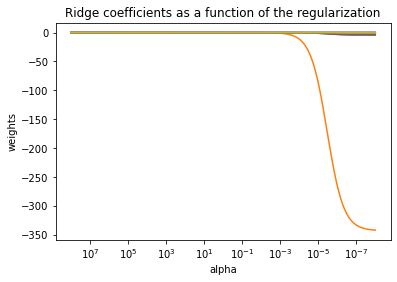

In [463]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

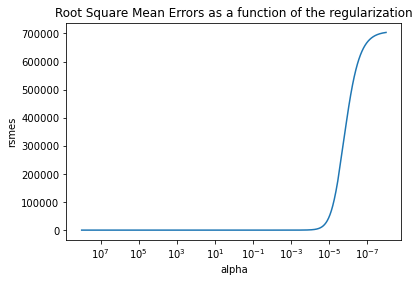

In [464]:
ax = plt.gca()

ax.plot(alphas, rsmes)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("rsmes")
plt.title("Root Square Mean Errors as a function of the regularization")
plt.axis("tight")
plt.show()

In [470]:
rsmes_argmin = np.argmin(rsmes)
min_rsmes = rsmes[rsmes_argmin]
optimum_coefs = coefs[np.argmin(rsmes)]
optimum_alpha = alphas[np.argmin(rsmes)]

print('RSMES argmin: ', str(rsmes_argmin))
print('min rsmes: ', str(min_rsmes))
print('coefs for min rsmes:\n', str(optimum_coefs))
print('alpha for min rsmes: ', str(optimum_alpha))

RSMES argmin:  1594
min rsmes:  0.6471547511126203
coefs for min rsmes:
 [-0.01699577  0.00014776  0.00052489 -0.03286392 -0.0022445   0.00474765
 -0.00540821 -0.00827235  0.00075361]
alpha for min rsmes:  57329.63669358215


In [473]:
# check
clf = Ridge(alpha=optimum_alpha)
clf.fit(X, y)
y_hat = np.dot(X, clf.coef_)
mean_squared_error(y,  y_hat)

0.6471547511126203

In [478]:
#errors.shape

(2834,)

In [482]:
resisuals = y - y_hat

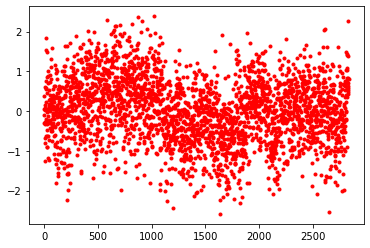

In [491]:
plt.scatter(x = np.arange(len(resisuals)), y = resisuals, color = 'red', marker = '.' )

In [351]:
alphas

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [442]:
X_corr = X.corr()
X_corr.style.background_gradient(cmap='coolwarm').set_precision(3)
#plt.matshow()
#plt.show()

,avg_sentence_length,avg_syllables_per_word,difficult_words,difficult_words2,poly_syllable_count,flesch_reading_ease,gunning_fog,smog_index,dale_chall_readability_score
avg_sentence_length,1.000,0.228,0.062,0.204,0.120,-0.703,0.975,0.395,0.378
avg_syllables_per_word,0.228,1.000,0.106,0.843,0.884,-0.853,0.260,0.856,0.189
difficult_words,0.062,0.106,1.000,0.099,0.054,-0.110,0.269,0.082,0.680
difficult_words2,0.204,0.843,0.099,1.000,0.855,-0.725,0.214,0.801,0.118
poly_syllable_count,0.120,0.884,0.054,0.855,1.000,-0.710,0.127,0.860,0.055
flesch_reading_ease,-0.703,-0.853,-0.110,-0.725,-0.710,1.000,-0.713,-0.837,-0.341
gunning_fog,0.975,0.260,0.269,0.214,0.127,-0.713,1.000,0.408,0.521
smog_index,0.395,0.856,0.082,0.801,0.860,-0.837,0.408,1.000,0.210
dale_chall_readability_score,0.378,0.189,0.680,0.118,0.055,-0.341,0.521,0.210,1.000


In [338]:
import seaborn as sns

<AxesSubplot:>

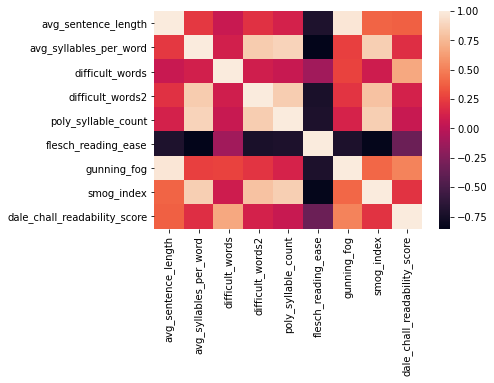

In [340]:
sns.heatmap(X.corr())

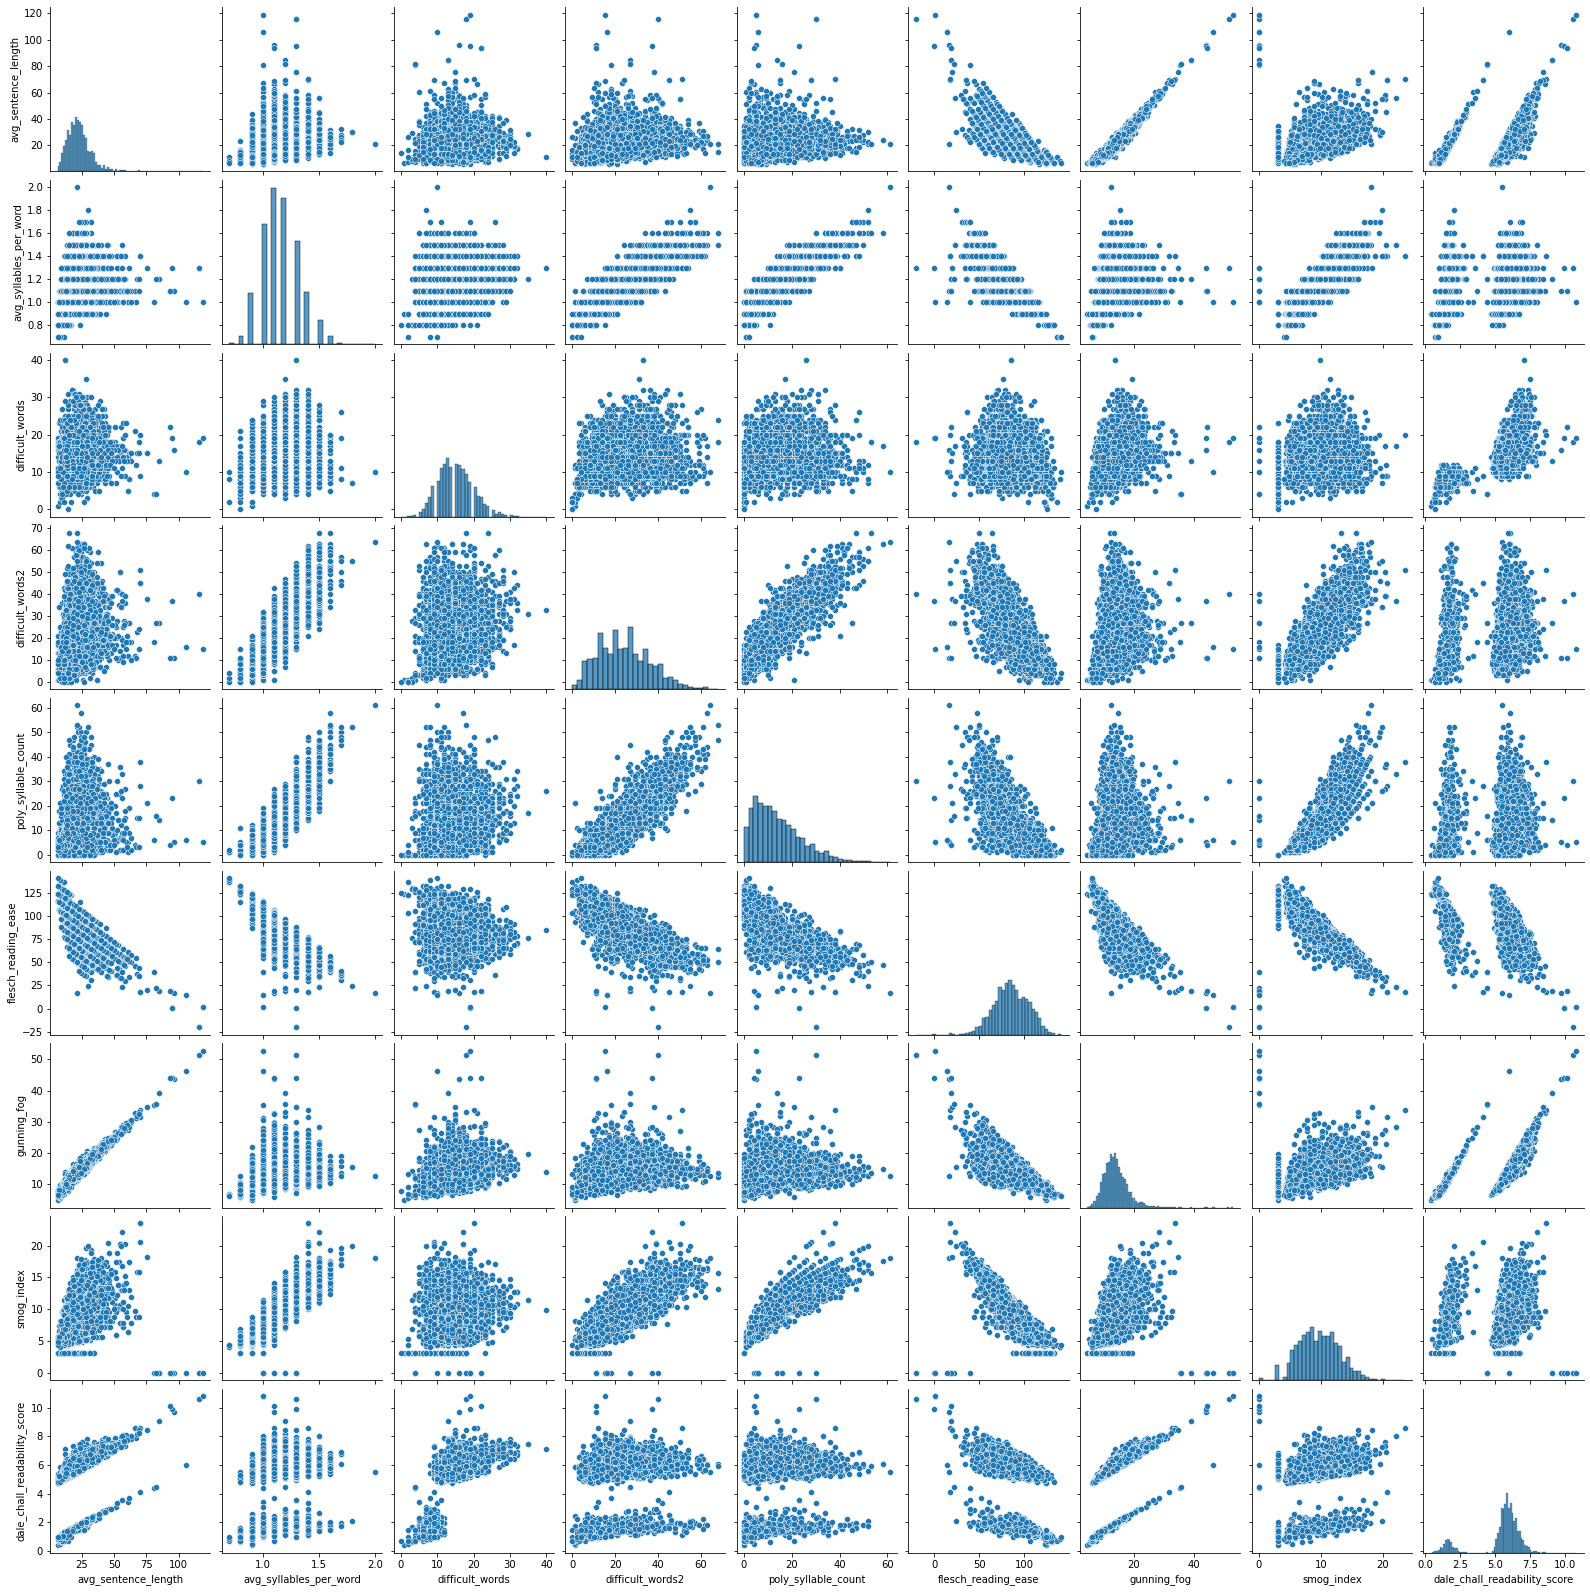

In [443]:
sns.pairplot(X)

In [467]:
rsmes

[703570.4535578985,
 703493.5156420822,
 703415.164926809,
 703335.3549034852,
 703254.0795785687,
 703171.3265339062,
 703087.0221668753,
 703001.1879748413,
 702913.7708348491,
 702824.7313441399,
 702734.0771913994,
 702641.7221914137,
 702547.6803088711,
 702451.9263071489,
 702354.3938249053,
 702255.0638405762,
 702153.9041861064,
 702050.895755715,
 701945.992896314,
 701839.1631529023,
 701730.4019886464,
 701619.5891016255,
 701506.7736199959,
 701391.8764948098,
 701274.8856696902,
 701155.7425904088,
 701034.3953378648,
 700910.8591544083,
 700785.0355892335,
 700656.8994067085,
 700526.432782967,
 700393.5842685786,
 700258.2890380725,
 700120.5022836014,
 699980.2267371522,
 699837.370797872,
 699691.8969167634,
 699543.7609891141,
 699392.9255830273,
 699239.3400112271,
 699082.9469999961,
 698923.6961382267,
 698761.5372514207,
 698596.4268517726,
 698428.3078192945,
 698257.1039691422,
 698082.7992379087,
 697905.2965630469,
 697724.5938040487,
 697540.59465545,
 697353

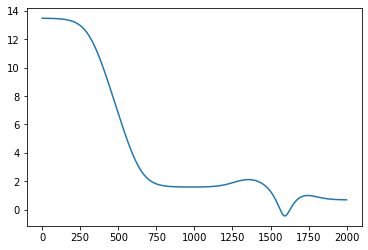

In [468]:
plt.plot(np.log(rsmes))

In [336]:
alphas

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [317]:
lenalphas

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [505]:
train.head()
#train[X.columns]

,id,url_legal,license,excerpt,target,standard_error,excerpt_no_newline,avg_sentence_length,avg_syllables_per_word,difficult_words,...,dale_chall_readability_score,avg_sentence_length_no_newline,avg_syllables_per_word_no_newline,difficult_words_no_newline,difficult_words2_no_newline,poly_syllable_count_no_newline,flesch_reading_ease_no_newline,gunning_fog_no_newline,smog_index_no_newline,dale_chall_readability_score_no_newline
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,When the young people returned to the ballroom...,14.200000,1.1,12,...,5.23,14.200000,1.1,12,25,10,99.36,9.933521,7.8,5.23
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,"All through dinner time, Mrs. Fayre was somewh...",12.000000,1.0,19,...,5.55,12.000000,1.0,19,17,10,110.06,10.133333,7.3,5.55
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,"As Roger had predicted, the snow departed as q...",16.769231,1.0,15,...,5.55,16.769231,1.0,15,17,12,105.21,11.459986,8.6,5.55
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,And outside before the palace a great garden w...,33.500000,1.0,15,...,6.48,33.500000,1.0,15,14,2,88.23,18.385075,6.4,6.48
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,Once upon a time there were Three Bears who li...,36.600000,0.9,7,...,2.42,36.600000,0.9,7,1,1,93.55,18.170055,5.7,2.42


In [508]:
train_v2 = train[X.columns]
train_v2 = train_v2.assign(id = train['id'],
                           excerpt = train['excerpt'],
                           target = y,
                           target_hat = y_hat,
                           resisuals = resisuals
                          )

train_v2.head()
train_v2.to_csv('./Data/commonlitreadability/train_modified_v2.csv')

In [288]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
print(str(y.shape))
X = rng.randn(n_samples, n_features)
print(str(X.shape))
clf = Ridge(alpha=1.0)
clf.fit(X, y)

(10,)
(10, 5)


Ridge()

In [252]:
clf.coef_

array([ 0.51088991,  0.03729032, -0.65075201,  0.0930311 ,  0.93380887])

In [253]:
X

array([[ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215],
       [ 0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223],
       [ 0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117]])

In [254]:
y

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [265]:
mse = np.power(y - np.dot(X, clf.coef_), 2)
mse

array([2.90932876e+00, 6.54321894e-01, 5.94012575e-01, 1.81091105e+00,
       2.90950077e+00, 5.08679944e-06, 5.22458149e-01, 9.48525121e-01,
       2.06161125e-02, 6.14443424e-01])

In [264]:
for x in mse:
    print("{:.8f}".format(x))

2.90932876
0.65432189
0.59401257
1.81091105
2.90950077
0.00000509
0.52245815
0.94852512
0.02061611
0.61444342


In [289]:
clf = Ridge(alpha=np.exp(-5))
clf.fit(X, y)

Ridge(alpha=0.006737946999085467)

In [290]:
mse = np.power(y - np.dot(X, clf.coef_), 2)
mse

array([2.98079761, 2.90173966, 2.14655472, 1.4816711 , 2.31493261,
       1.04309987, 2.04208564, 2.97662165, 0.93307613, 0.75348523])

In [291]:
for x in mse:
    print("{:.8f}".format(x))

2.98079761
2.90173966
2.14655472
1.48167110
2.31493261
1.04309987
2.04208564
2.97662165
0.93307613
0.75348523


In [292]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
print(len(alphas))

200


In [294]:
coefs = []
for a in alphas:
    clf = Ridge(alpha=a)
    clf.fit(X, y)
    #ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    #ridge.fit(X, y)
    print(str(len(clf.coef_)))
    coefs.append(clf.coef_)

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [319]:
import matplotlib.pyplot as plt

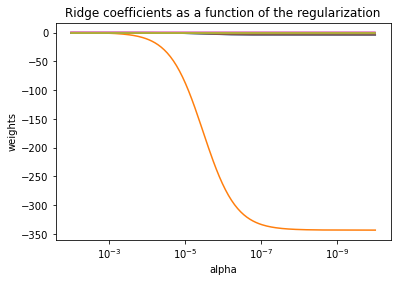

In [320]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()